## Predict User's who will do the Purchase

- Given
    - The training data is pulled from raw logs. It has three columns that record user activity over time:
        user_id: A hash that uniquely identifies the user.
        activity_date: The date of the activity
        activity_type: The type of activity
        
- To do
    - Using the training data, build a model that predicts which user_id's will make a purchase in the future. Use the model to score the test data from most likely to least likely to purchase.
    - Describe which activity types are most useful in predicting which user will purchase in the future.
    - Generate a file containing the 1000 user_id's most likely to convert.
    
    
### My Approach


- Reading training data file
- Checking the data present and understanding it.
    - Converting the columns and deriving new columns
- Doing Exploratry Analysis
    - Feature Selection
- Spliting data to train-test
- Using Machine Learning algorithms to train the model
- Testing the trained model
- Reading the Unknown test data
    - bringing to valid format
- Predicting the results
- Answering the To do question list above by finding the proper results
- Conclusion

### Imports

In [1]:
import numpy as np
import sklearn
import pandas as pd

from sklearn.metrics import accuracy_score,classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


import datetime as dt

#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

## Read File

In [2]:
df = pd.read_csv('training.tsv',sep='\t', header=None, names=['User_id','Date','Type'])
df

,User_id,Date,Type
0,00002acbe042d69,2013-07-11,EmailOpen
1,00002acbe042d69,2013-07-11,FormSubmit
2,00002acbe042d69,2013-07-15,EmailOpen
3,00002acbe042d69,2013-07-17,EmailOpen
4,00002acbe042d69,2013-07-18,EmailOpen
5,00002acbe042d69,2013-07-25,EmailOpen
6,00002acbe042d69,2013-07-26,EmailOpen
7,00002acbe042d69,2013-08-01,EmailOpen
8,00002acbe042d69,2013-08-05,EmailOpen
9,00002acbe042d69,2013-08-12,EmailOpen


 Let's first plot the count of activity types that are available in the data and see the data distribution.

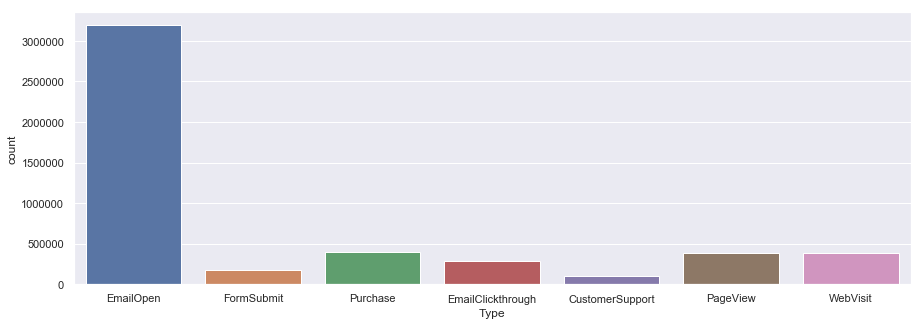

In [4]:
# set seaborn graph size
sns.set(rc={'figure.figsize':(15,5)})

#plot the graph
sns.countplot(x='Type',data=df)

The count above is about the activities that are performed by different user's. It can be observed EmailOpen activity is carried on large extent with respect to other activities.

Let's just take this into consideration and I will proceed with next steps.

#### Checking types and deriving new columns

- I will first check the types of each columns. It can be observed that , date column is of type object, so I will convert it to Datetime type.

- Afterwards, I will derive two new columns Quarters and Weekend from the Date column.
    - The reason behind deriving these columns are making proper utilization of Date field. Date is ID column and hence cannot participate directly in the predictions.It has to be presented in form of a dimensions so that pattern can be traced.Hence, deriving some important outcomes like Quarters and weekends proves to be useful in most cases.
    - Also I observed the data and thought of involving these columns to do some further analysis.

In [5]:
df.dtypes

User_id    object
Date       object
Type       object
dtype: object

In [6]:
# converting date to proper datetime datatype
df['Date'] = pd.DatetimeIndex(df['Date'])

# deriving new columns from Date column
df['Quarter'] = df.Date.dt.quarter
df['Weekend'] = ((df.Date.dt.weekday)// 5 == 1).astype(int)
df

,User_id,Date,Type,Quarter,Weekend
0,00002acbe042d69,2013-07-11,EmailOpen,3,0
1,00002acbe042d69,2013-07-11,FormSubmit,3,0
2,00002acbe042d69,2013-07-15,EmailOpen,3,0
3,00002acbe042d69,2013-07-17,EmailOpen,3,0
4,00002acbe042d69,2013-07-18,EmailOpen,3,0
5,00002acbe042d69,2013-07-25,EmailOpen,3,0
6,00002acbe042d69,2013-07-26,EmailOpen,3,0
7,00002acbe042d69,2013-08-01,EmailOpen,3,0
8,00002acbe042d69,2013-08-05,EmailOpen,3,0
9,00002acbe042d69,2013-08-12,EmailOpen,3,0


In [7]:
# Now removing date column from the dataframe and I will only used the derived columns for further analysis and training the data for 
# performing predictions

del df['Date']
df

,User_id,Type,Quarter,Weekend
0,00002acbe042d69,EmailOpen,3,0
1,00002acbe042d69,FormSubmit,3,0
2,00002acbe042d69,EmailOpen,3,0
3,00002acbe042d69,EmailOpen,3,0
4,00002acbe042d69,EmailOpen,3,0
5,00002acbe042d69,EmailOpen,3,0
6,00002acbe042d69,EmailOpen,3,0
7,00002acbe042d69,EmailOpen,3,0
8,00002acbe042d69,EmailOpen,3,0
9,00002acbe042d69,EmailOpen,3,0


- Now from the above dataframe, it can be observed that. I have got three columns which contains some unique values for each user and each activity over the time.

- I want to find out which activities are really useful in deciding/predicting which user are going to purchase, so the best option here is using crosstabulation.

    - I will use pandas crosstab functionality which will give me the frequency of each factors/values for each customers and their activities. These columns values will form seperate columns i.e cross tabulation.

    - The reason behind doing this is 
        - Every user have performed some different/same activities on different/same dates(here simplified with quarters and weekends). So, finding the frequencies of each activities will help in giving the relations between different activities that are being performed by every users.
        - Hence, EmailOpen activity might have some relevance with EmailClickThrough activity or so on with others. ( I have done some exploratory analysis later in this notebook)
        - Thus, bringing the data in cross-tabulation form is helpful.
        
        
In the below cells, I have cross tabulated three columns Types, Quarters and Weekends and did some operations on them.


In [8]:
type_df = pd.crosstab(index=df['User_id'], columns=df['Type'])
type_df

Type,CustomerSupport,EmailClickthrough,EmailOpen,FormSubmit,PageView,Purchase,WebVisit
User_id,,,,,,,
00002acbe042d69,0,0,9,1,0,0,0
0000a3a34bd07e6,0,0,20,0,0,0,0
0000ecf58c94668,1,1,11,1,0,6,0
00012205dd4613b,0,0,2,0,0,0,0
000198d39a568cf,1,0,0,0,0,1,0
0001b315b991cf0,0,0,1,0,0,0,0
00022618457fcf2,1,0,0,0,0,1,0
000256826de4432,1,0,0,0,0,1,0
000269150971d08,0,0,3,0,0,0,0


Now here, the Purchase column values gives us the frequency for each customer. So, the frequency value 1 or greater than 1 suggests that yes the user have done the purchase somewhere and sometime, whereas the frequency 0 defines that the customer have never done the purchase.

#### So here I am bringing the Purchase column values into binary values 0 ( No Purchase) and 1 (Purchase), and this will be treated as my target label for the training and predictions.

In [9]:
type_df['Purchase'] = (type_df['Purchase'] >= 1).astype(int)
type_df

Type,CustomerSupport,EmailClickthrough,EmailOpen,FormSubmit,PageView,Purchase,WebVisit
User_id,,,,,,,
00002acbe042d69,0,0,9,1,0,0,0
0000a3a34bd07e6,0,0,20,0,0,0,0
0000ecf58c94668,1,1,11,1,0,1,0
00012205dd4613b,0,0,2,0,0,0,0
000198d39a568cf,1,0,0,0,0,1,0
0001b315b991cf0,0,0,1,0,0,0,0
00022618457fcf2,1,0,0,0,0,1,0
000256826de4432,1,0,0,0,0,1,0
000269150971d08,0,0,3,0,0,0,0


In [10]:
quarters_df = pd.crosstab(index=df['User_id'], columns=df['Quarter'])

# giving valid names to the columns
quarters_df.columns= ['Q1','Q2','Q3','Q4']
quarters_df

,Q1,Q2,Q3,Q4
User_id,,,,
00002acbe042d69,0,0,10,0
0000a3a34bd07e6,7,3,3,7
0000ecf58c94668,8,3,3,6
00012205dd4613b,0,0,0,2
000198d39a568cf,2,0,0,0
0001b315b991cf0,0,1,0,0
00022618457fcf2,0,0,2,0
000256826de4432,0,0,0,2
000269150971d08,2,1,0,0


In [11]:
weekend_df = pd.crosstab(index=df['User_id'], columns=df['Weekend'])

# giving valid names to the columns
weekend_df.columns = ['Weekend_NO','Weekend_YES']
weekend_df

,Weekend_NO,Weekend_YES
User_id,,
00002acbe042d69,10,0
0000a3a34bd07e6,15,5
0000ecf58c94668,17,3
00012205dd4613b,2,0
000198d39a568cf,2,0
0001b315b991cf0,1,0
00022618457fcf2,2,0
000256826de4432,2,0
000269150971d08,3,0


In [12]:
combined_df = pd.concat([type_df,quarters_df,weekend_df],axis=1)
combined_df

,CustomerSupport,EmailClickthrough,EmailOpen,FormSubmit,PageView,Purchase,WebVisit,Q1,Q2,Q3,Q4,Weekend_NO,Weekend_YES
User_id,,,,,,,,,,,,,
00002acbe042d69,0,0,9,1,0,0,0,0,0,10,0,10,0
0000a3a34bd07e6,0,0,20,0,0,0,0,7,3,3,7,15,5
0000ecf58c94668,1,1,11,1,0,1,0,8,3,3,6,17,3
00012205dd4613b,0,0,2,0,0,0,0,0,0,0,2,2,0
000198d39a568cf,1,0,0,0,0,1,0,2,0,0,0,2,0
0001b315b991cf0,0,0,1,0,0,0,0,0,1,0,0,1,0
00022618457fcf2,1,0,0,0,0,1,0,0,0,2,0,2,0
000256826de4432,1,0,0,0,0,1,0,0,0,0,2,2,0
000269150971d08,0,0,3,0,0,0,0,2,1,0,0,3,0


In [13]:
combined_df.describe()

,CustomerSupport,EmailClickthrough,EmailOpen,FormSubmit,PageView,Purchase,WebVisit,Q1,Q2,Q3,Q4,Weekend_NO,Weekend_YES
count,341568.000000,341568.000000,341568.000000,341568.000000,341568.000000,341568.000000,341568.000000,341568.000000,341568.000000,341568.000000,341568.000000,341568.000000,341568.000000
mean,0.304452,0.836050,9.344353,0.515467,1.119142,0.304452,1.124300,4.453997,2.954182,3.296231,3.695876,13.497632,0.902655
std,0.460176,4.460062,23.094718,2.806039,9.844066,0.460176,9.837606,13.547946,9.162689,11.529343,12.289028,41.637053,4.236099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.000000
75%,1.000000,1.000000,8.000000,0.000000,0.000000,1.000000,0.000000,4.000000,3.000000,3.000000,3.000000,10.000000,1.000000
max,1.000000,463.000000,630.000000,430.000000,596.000000,1.000000,596.000000,749.000000,487.000000,747.000000,735.000000,2248.000000,470.000000


In [14]:
combined_df.nunique()

CustomerSupport        2
EmailClickthrough    163
EmailOpen            428
FormSubmit           126
PageView             307
Purchase               2
WebVisit             302
Q1                   332
Q2                   246
Q3                   309
Q4                   313
Weekend_NO           789
Weekend_YES          164
dtype: int64

## Exploratory Analysis

It very important to do some exploratory analysis on the features that are available and see how they affect or have relation with each other and the target variable. 

Doing this analysis helps in identifying some key features or some important insights.

Below, I am using two methods Correlation matrix and SelectKBest features package of Feature Selection Technique that will help in identifying correlation between different features and some best features that might be useful in predicting target label respectively.

1. Correlation matrix and Heatmap
    
    - Correlation states how the features are related to each other or the target variable.
    - Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
    - Heatmap makes it easy to identify which features are most related to the target variable. 


2. SelectKBest ( Univariate selection)

    - Statistical tests can be used to select those features that have the strongest relationship with the output variable.
    - The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
    - The example below uses the chi-squared (chi²) statistical test for non-negative features to select 5 best features from the combined_df dataframe that I have.

### Correlation

In [15]:
correlation_df = combined_df.copy()

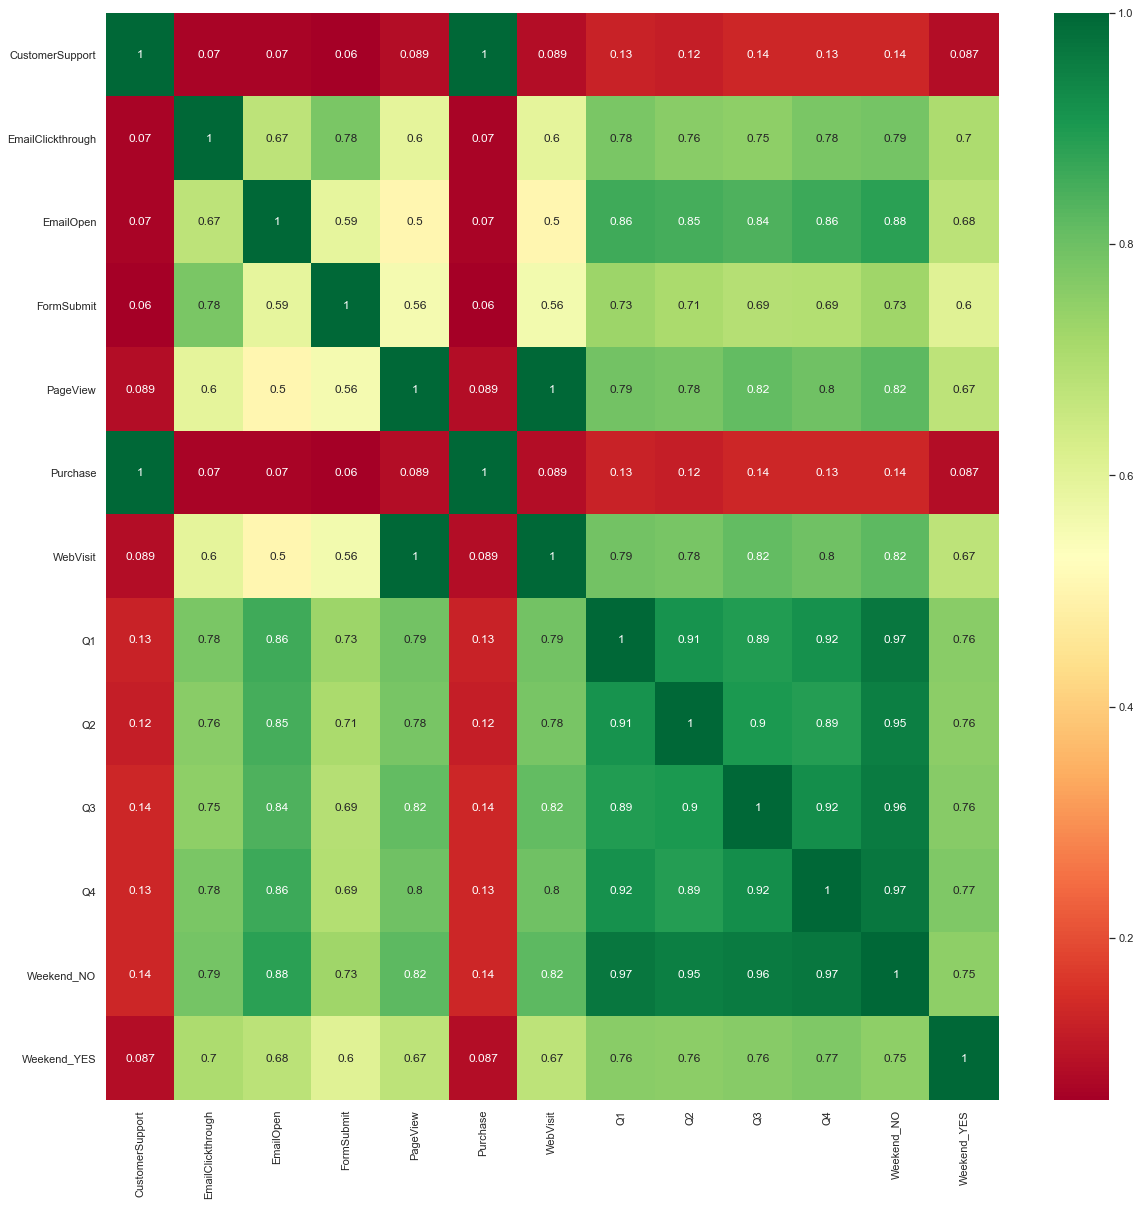

In [16]:
#get correlations of each features in dataset
corrmat = correlation_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(correlation_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

From the correlation matrix, it can be observed that CustomerSupport and Purchase are very highly correlated ( value 1.0 ). This is because CustomerSupport also has only two values. However, I wont consider this column for training my data for two reasons:
    1. Very high correlation can make a decision bias towards it.
    2. In my Unknown test data, there is no record with CustomerSupport acitvity.
    
So it best option to remove the CustomerSupport column.

Even PageView and Webvisit are highly correlated to each other. This can also help in understanding that, these activities are generally performed together or one after other.



In [17]:
# deleting the CustomerSupport column

del combined_df['CustomerSupport']

### SelectKBest (Univariate Selection)

In [18]:
X_best = combined_df.copy()
y_best = X_best.pop('Purchase')


#apply SelectKBest class to extract top 6 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X_best,y_best)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_best.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(6,'Score'))  #print 6 best features

        Specs          Score
9  Weekend_NO  815091.615585
7          Q3  254273.614476
8          Q4  249979.704034
5          Q1  232702.694363
3    PageView  232627.218856
4    WebVisit  230378.670230


From the above Univariate Selection, it can be observed that Weekend_No i.e Weekdays are more preffered by Customers for Purchase.

Whereas, Quarter 3 and Quarter 4 are also the best features in predicting Purchase.

From the activities types - PageView and WebVisit are important features.

### Heading towards the Predictions

In the test dataset the data is available only for the 2nd and 3rd Quarter. So I will be removing Q1 and Q4 column from training data.

#### *Although, from the Feature Selection it can be seen that, these columns were one of the best columns for predicting. So, it should be taken as a note that, make customers do the Purchase more during these quarters.*

I am also now putting the final dataframe into variable X which will be used as a Training Dataframe and I will pop the column Purchase as our target variable and save it in variable y.


In [19]:
# deleting columns Q1 and Q4 because they are not available in my unknown test data.
del combined_df['Q1']
del combined_df['Q4']

X = combined_df
y = combined_df.pop('Purchase')

# lets see the shape of our data
print(X.shape)
print(y.shape)


(341568, 9)
(341568,)


### Perform Train-Test-Split

So now, I am all set for training the model, a final step before that is splitting the data in to training and testing datasets
There are many methods for splitting the data and doing model validation like

 - Simple Hold-Out Strategy (splitting data into Train and Test (with either 80-20 or 70-30 split)
 - Three-way-hold-out strategy ( splitting data into Training,Validation and Testing ( 50-20-30 split)
 - Cross Validation (K-Fold cross-validation or RepeatedKfold etc)
 - Leave-One-Out
 - Grid Search etc.

Note: It necessarily depends on the requirements and the type of data we have. In order to evaluate your model effectively, trial to all these strategies should be given and checked which is perfectly suitable to your data.

I am going to use Simple hold out strategy here because the data is not that much more and also use cross_val_score function of sklearn which performs cross-validation.

In [52]:
X_train, X_test, y_train, y_test \
    = train_test_split(X, \
                                        y, \
                                        random_state=0, \
                                        train_size = 0.8)
    
print(X_train.shape)
print(X_test.shape)

(273254, 9)
(68314, 9)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Applying Machine Learning Models

The most important task here is to decide, which algorithm is right for my need, there is no such algorithm which I can call as best. As every algorithm learns the intrinsic properties of the data differently.

Given a Supervised Situation, where I need to run a Classification model, several algorithms come to my mind,

1] Decision tree

2] Random Forest

3] K-Nearest Neighbour

4] Naive Bayes

5] Ada Boost

6] Logistic Regression

The best way to decide which algorithm performs best in my case is to run all of these algorithms and select one with better confusion matrix result and also by learning the underlying concepts and uses of each algorithm. 

Here, I would short list a few alogrithms which have different intrinsic properties and that might work on my data.

    - Decision trees are a type of model used for both classification and regression. Trees answer sequential questions which send us down a certain route of the tree given the answer. The model behaves with “if this than that” conditions ultimately yielding a specific result. 

    - Random Forest is an Ensemble model approach of Decision Trees and it is highly scalable and generally used in real worl applications

    - K-NN uses distance metrics and hence they might bring some variations in the predictions.

Let's try all this different algos,

### Decision Tree

In [53]:
my_tree = tree.DecisionTreeClassifier()
my_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
# Make a set of predictions for the test data
y_pred = my_tree.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
#model_valid_accuracy_comparisons["Random Forest"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.9723043592821383
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     47422
           1       0.95      0.96      0.95     20892

   micro avg       0.97      0.97      0.97     68314
   macro avg       0.97      0.97      0.97     68314
weighted avg       0.97      0.97      0.97     68314

Confusion Matrix


Predicted,0,1,All
True,,,
0,46464,958,47422
1,934,19958,20892
All,47398,20916,68314


In [55]:
dt_scores = cross_val_score(my_tree,X_train,y_train,cv=10)
print(dt_scores)
print(dt_scores.mean())

[0.9703579  0.96944302 0.97083364 0.96926005 0.96922345 0.97013724
 0.97149131 0.97006404 0.96874657 0.97192944]
0.970148665366453


### Random Forest

In [200]:
rf_model = ensemble.RandomForestClassifier()
rf_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [201]:
# Make a set of predictions for the test data
y_pred = rf_model.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.9681617238047838
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     47422
           1       0.97      0.93      0.95     20892

   micro avg       0.97      0.97      0.97     68314
   macro avg       0.97      0.96      0.96     68314
weighted avg       0.97      0.97      0.97     68314

Confusion Matrix


Predicted,0,1,All
True,,,
0,46782,640,47422
1,1535,19357,20892
All,48317,19997,68314


In [162]:
rfc_scores = cross_val_score(rf_model,X_train,y_train,cv=10)
print(rfc_scores)
print(rfc_scores.mean())

[0.96651541 0.96713752 0.96640562 0.96797921 0.96969919 0.96794145
 0.96819762 0.9683806  0.96537969 0.96757429]
0.967521060703897


In [59]:
# which features lead affects more to target variables
a = list(zip(X.columns,rf_model.feature_importances_))
print(a)

[('EmailClickthrough', 0.062258892471113325), ('EmailOpen', 0.5040269200562486), ('FormSubmit', 0.08167650163983478), ('PageView', 0.01632978162611213), ('WebVisit', 0.032079155741725554), ('Q2', 0.04160419809504373), ('Q3', 0.03931857492233733), ('Weekend_NO', 0.16029618375184618), ('Weekend_YES', 0.06240979169573839)]


I will try using the feature_importance method provided by the Random Forest classifier. However, the feature importances from random forest are calculated based on the training data given to the model, not on predictions on a test dataset.

Thus, these numbers do not indicate the true predictive power of the model! As it can be seen EmailOpen has got larger importance because it is present in large number.

### KNN

In [28]:
knn_model = neighbors.KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
# Make a set of predictions for the test data
y_pred = knn_model.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
#model_valid_accuracy_comparisons["Random Forest"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.9709722750827063
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     47422
           1       0.96      0.94      0.95     20892

   micro avg       0.97      0.97      0.97     68314
   macro avg       0.97      0.96      0.97     68314
weighted avg       0.97      0.97      0.97     68314

Confusion Matrix


Predicted,0,1,All
True,,,
0,46659,763,47422
1,1220,19672,20892
All,47879,20435,68314


Ideally, I would like to minimize both error due to bias and error due to variance. *Hence, I would like to go for Random Forest for doing predictions over unknown test data.* It is a ensemble model and I think Random forests mitigate this problem well. 

A random forest is simply a collection of decision trees whose results are aggregated into one final result. Their ability to limit overfitting without substantially increasing error due to bias is why they are such powerful models. 

#### Therefore, Random forests are a strong modeling technique and much more robust than a single decision tree. They aggregate many decision trees to limit overfitting as well as error due to bias and therefore yield useful results.

## TEST Unknown data

Following the same procedure with unknown test data i.e to bring my data in proper format, so that I can apply my trained model to do the predictions.

### Read File

In [61]:
test_df = pd.read_csv('test.tsv',sep='\t', header=None, names=['User_id','Date','Type'])
test_df

,User_id,Date,Type
0,0000ecf58c94668,2015-05-20,EmailOpen
1,0000ecf58c94668,2015-06-11,EmailOpen
2,0000ecf58c94668,2015-06-29,EmailOpen
3,0000ecf58c94668,2015-07-05,EmailOpen
4,0000ecf58c94668,2015-07-29,EmailOpen
5,000132f21724ee2,2015-05-15,EmailClickthrough
6,000132f21724ee2,2015-05-15,EmailOpen
7,0001b315b991cf0,2015-05-06,EmailOpen
8,0001b315b991cf0,2015-06-29,EmailOpen
9,0001b315b991cf0,2015-06-30,EmailOpen


Converting Date column to Datetime type and deriving new columns from it.

In [62]:
test_df['Date'] = pd.DatetimeIndex(test_df['Date'])
test_df['Quarter'] = test_df.Date.dt.quarter
test_df['Weekend'] = ((test_df.Date.dt.weekday)// 5 == 1).astype(int)
test_df

,User_id,Date,Type,Quarter,Weekend
0,0000ecf58c94668,2015-05-20,EmailOpen,2,0
1,0000ecf58c94668,2015-06-11,EmailOpen,2,0
2,0000ecf58c94668,2015-06-29,EmailOpen,2,0
3,0000ecf58c94668,2015-07-05,EmailOpen,3,1
4,0000ecf58c94668,2015-07-29,EmailOpen,3,0
5,000132f21724ee2,2015-05-15,EmailClickthrough,2,0
6,000132f21724ee2,2015-05-15,EmailOpen,2,0
7,0001b315b991cf0,2015-05-06,EmailOpen,2,0
8,0001b315b991cf0,2015-06-29,EmailOpen,2,0
9,0001b315b991cf0,2015-06-30,EmailOpen,2,0


Deleting date for further analysis

In [63]:
del test_df['Date']
test_df

,User_id,Type,Quarter,Weekend
0,0000ecf58c94668,EmailOpen,2,0
1,0000ecf58c94668,EmailOpen,2,0
2,0000ecf58c94668,EmailOpen,2,0
3,0000ecf58c94668,EmailOpen,3,1
4,0000ecf58c94668,EmailOpen,3,0
5,000132f21724ee2,EmailClickthrough,2,0
6,000132f21724ee2,EmailOpen,2,0
7,0001b315b991cf0,EmailOpen,2,0
8,0001b315b991cf0,EmailOpen,2,0
9,0001b315b991cf0,EmailOpen,2,0


Implementing crosstab functionality on all the columns.

In [64]:
test_type_df = pd.crosstab(index=test_df['User_id'], columns=test_df['Type'])
test_type_df

Type,EmailClickthrough,EmailOpen,FormSubmit,PageView,WebVisit
User_id,,,,,
0000ecf58c94668,0,5,0,0,0
000132f21724ee2,1,1,0,0,0
0001b315b991cf0,0,3,0,0,0
000269150971d08,0,4,0,0,0
000297ba4fa5026,0,3,0,0,0
000342505b41079,0,7,0,0,0
0003b304dd7cfae,0,1,0,0,0
0003ee709c3b5dc,0,3,0,0,0
00049247bdf8ddf,1,2,1,1,1


In [65]:
test_quarters_df = pd.crosstab(index=test_df['User_id'], columns=test_df['Quarter'])
test_quarters_df.columns= ['Q2','Q3']
test_quarters_df

,Q2,Q3
User_id,,
0000ecf58c94668,3,2
000132f21724ee2,2,0
0001b315b991cf0,3,0
000269150971d08,3,1
000297ba4fa5026,3,0
000342505b41079,6,1
0003b304dd7cfae,1,0
0003ee709c3b5dc,3,0
00049247bdf8ddf,6,0


In [66]:
test_weekend_df = pd.crosstab(index=test_df['User_id'], columns=test_df['Weekend'])
test_weekend_df.columns = ['Weekend_NO','Weekend_YES']
test_weekend_df

,Weekend_NO,Weekend_YES
User_id,,
0000ecf58c94668,4,1
000132f21724ee2,2,0
0001b315b991cf0,3,0
000269150971d08,4,0
000297ba4fa5026,3,0
000342505b41079,7,0
0003b304dd7cfae,1,0
0003ee709c3b5dc,3,0
00049247bdf8ddf,6,0


In [202]:
test_combined_df = pd.concat([test_type_df,test_quarters_df,test_weekend_df],axis=1)
test_combined_df

,EmailClickthrough,EmailOpen,FormSubmit,PageView,WebVisit,Q2,Q3,Weekend_NO,Weekend_YES
User_id,,,,,,,,,
0000ecf58c94668,0,5,0,0,0,3,2,4,1
000132f21724ee2,1,1,0,0,0,2,0,2,0
0001b315b991cf0,0,3,0,0,0,3,0,3,0
000269150971d08,0,4,0,0,0,3,1,4,0
000297ba4fa5026,0,3,0,0,0,3,0,3,0
000342505b41079,0,7,0,0,0,6,1,7,0
0003b304dd7cfae,0,1,0,0,0,1,0,1,0
0003ee709c3b5dc,0,3,0,0,0,3,0,3,0
00049247bdf8ddf,1,2,1,1,1,6,0,6,0


### Making Predictions

In [203]:
# Random forest model
# Make a set of predictions for the test data using predict function
y_pred = rf_model.predict(test_combined_df)

print(type(y_pred))
print(y_pred)

<class 'numpy.ndarray'>
[0 0 0 ... 0 0 0]


Now I need to score the test data based on the predictions from most likely to least likely Purchase. So, I will use the predict_proba() function of the Random forest classifier.

This function will give me the probability scores for the target variables. They will range from 0 to 1. 

In [204]:
y_prob_pred = rf_model.predict_proba(test_combined_df)

print(type(y_prob_pred))
print(y_prob_pred)

<class 'numpy.ndarray'>
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


I need to focus only on the target label 1, which states that these user's will be my potential users that are predicted as they will purchase

In [205]:
y_prob_pred = y_prob_pred[:, 1]

Appending these predicted and probability values to the dataframe

In [206]:
## random forest result
test_combined_df['Predicted_values']=y_pred.tolist()
test_combined_df['Probability Pred Values'] = y_prob_pred.tolist()
test_combined_df

,EmailClickthrough,EmailOpen,FormSubmit,PageView,WebVisit,Q2,Q3,Weekend_NO,Weekend_YES,Predicted_values,Probability Pred Values
User_id,,,,,,,,,,,
0000ecf58c94668,0,5,0,0,0,3,2,4,1,0,0.0
000132f21724ee2,1,1,0,0,0,2,0,2,0,0,0.0
0001b315b991cf0,0,3,0,0,0,3,0,3,0,0,0.0
000269150971d08,0,4,0,0,0,3,1,4,0,0,0.0
000297ba4fa5026,0,3,0,0,0,3,0,3,0,0,0.0
000342505b41079,0,7,0,0,0,6,1,7,0,0,0.0
0003b304dd7cfae,0,1,0,0,0,1,0,1,0,0,0.0
0003ee709c3b5dc,0,3,0,0,0,3,0,3,0,0,0.0
00049247bdf8ddf,1,2,1,1,1,6,0,6,0,0,0.0


#### Potential customers

Now lets seperate the Potential Customers/Users i.e User_id's with predicted value as 1 into new dataframe.

It can be seen that there are more than 4000 Potential user's that will be Purchasing in future.

In [207]:
# random forest result
potential_cust_df = test_combined_df[test_combined_df['Predicted_values']==1.0]
potential_cust_df

,EmailClickthrough,EmailOpen,FormSubmit,PageView,WebVisit,Q2,Q3,Weekend_NO,Weekend_YES,Predicted_values,Probability Pred Values
User_id,,,,,,,,,,,
0008f1827dd6a01,0,0,1,1,1,0,3,3,0,1,0.6
000bc6834332f42,6,25,4,10,10,30,25,54,1,1,0.9
000de839628506d,2,7,0,9,9,22,5,27,0,1,0.6
001c027df16abb6,2,9,0,2,2,7,8,14,1,1,0.6
0026c11175b44f8,1,1,1,1,1,0,5,5,0,1,0.6
0041701c16c0a89,1,1,1,1,1,0,5,5,0,1,0.6
004838799d48cc3,0,17,1,6,6,19,11,30,0,1,0.6
004d19233e453e1,2,19,0,27,27,54,21,73,2,1,0.7
0051b1d2c3c4239,0,7,0,1,1,9,0,9,0,1,0.6


Here values for target label 1 will range from 0.5 to 1.0.

Therefore, from this I can score the Potential User's from Most Likely (0.9 or 1.0 scores) to Least Likely (0.5 or 0.6)

In [208]:
mostlikely_df = potential_cust_df[potential_cust_df['Probability Pred Values'] >=0.9]
mostlikely_df

,EmailClickthrough,EmailOpen,FormSubmit,PageView,WebVisit,Q2,Q3,Weekend_NO,Weekend_YES,Predicted_values,Probability Pred Values
User_id,,,,,,,,,,,
000bc6834332f42,6,25,4,10,10,30,25,54,1,1,0.9
011026476ee2fb0,2,49,0,20,20,76,15,89,2,1,0.9
01e3f460ec72931,29,80,28,75,75,199,88,245,42,1,0.9
0226b29725833e3,7,38,7,34,34,87,33,116,4,1,0.9
035eceba3170ab3,2,11,0,10,10,24,9,31,2,1,0.9
08acbcd6cd902d5,4,28,4,18,18,47,25,67,5,1,0.9
0a4030d3debeb27,0,7,0,7,7,10,11,20,1,1,0.9
0a814e3e0b85608,14,56,11,28,28,105,32,133,4,1,0.9
0abb2f699022a3a,7,28,3,34,34,72,34,102,4,1,0.9


In [209]:
least_likely_df = potential_cust_df[potential_cust_df['Probability Pred Values'] <0.7]
least_likely_df

,EmailClickthrough,EmailOpen,FormSubmit,PageView,WebVisit,Q2,Q3,Weekend_NO,Weekend_YES,Predicted_values,Probability Pred Values
User_id,,,,,,,,,,,
0008f1827dd6a01,0,0,1,1,1,0,3,3,0,1,0.6
000de839628506d,2,7,0,9,9,22,5,27,0,1,0.6
001c027df16abb6,2,9,0,2,2,7,8,14,1,1,0.6
0026c11175b44f8,1,1,1,1,1,0,5,5,0,1,0.6
0041701c16c0a89,1,1,1,1,1,0,5,5,0,1,0.6
004838799d48cc3,0,17,1,6,6,19,11,30,0,1,0.6
0051b1d2c3c4239,0,7,0,1,1,9,0,9,0,1,0.6
006fad270bd38f5,1,1,0,1,1,0,4,4,0,1,0.6
0085d9b8cbd52f8,1,1,0,1,1,0,4,4,0,1,0.6


#### These are the values who are predicted as potential customers, however these customers are not present in the training dataset. That means they are the new customers who are most likely to be converted as Potential customers.

In [210]:
diff_df = potential_cust_df.loc[potential_cust_df.index.isin(combined_df.index)==False]
diff_df

,EmailClickthrough,EmailOpen,FormSubmit,PageView,WebVisit,Q2,Q3,Weekend_NO,Weekend_YES,Predicted_values,Probability Pred Values
User_id,,,,,,,,,,,
0008f1827dd6a01,0,0,1,1,1,0,3,3,0,1,0.6
0041701c16c0a89,1,1,1,1,1,0,5,5,0,1,0.6
006fad270bd38f5,1,1,0,1,1,0,4,4,0,1,0.6
008aa75393217e6,0,0,1,1,1,0,3,3,0,1,0.6
00c748fbf935fe8,0,0,1,1,1,0,3,3,0,1,0.6
00df3c637e661a1,1,1,1,1,1,0,5,5,0,1,0.6
00e69e624e82fb3,1,1,0,1,1,0,4,4,0,1,0.6
00ee707e71b42f6,0,0,1,1,1,0,3,3,0,1,0.6
00f4c72afec9aad,0,0,1,1,1,0,3,3,0,1,0.6


### Conclusion:

Answering my To Do questions:

1. Using predict_proba() function I have scored the test data from most likely to least likely.

2. From the Feature Selection techniques, it can be observed that two activity types i.e PageView and WebVisit are most useful in predicting which user will purchase in the future.

3. There were between 600 to 1000 user's that are most likely to convert. File saved seperately.